In [1]:
from pathlib import Path

import tifffile
import numpy as np
import torch
import pooch
from matplotlib import pyplot as plt
from torch_cryoeraser import erase_region_2d

In [2]:
# https://github.com/fatiando/pooch
GOODBOY = pooch.create(
    path=pooch.os_cache("torch-cryoeraser"),
    base_url="doi:10.5281/zenodo.15269648/",
    registry={
        "EMPIAR-10164_TS_01_000_0.0_image.tif": "md5:5ae21ea749fd7298c6991dd9f8872b44",
        "EMPIAR-10164_TS_01_000_0.0_mask.tif": "md5:aae7af9995e0cede9d3d7c5ab4a9b1bf",
    },
)

IMAGE_FILE = Path(GOODBOY.fetch("EMPIAR-10164_TS_01_000_0.0_image.tif", progressbar=True))
MASK_FILE = Path(GOODBOY.fetch("EMPIAR-10164_TS_01_000_0.0_mask.tif", progressbar=True))

In [3]:
# load images as torch tensors
image = tifffile.imread(IMAGE_FILE)
image = torch.tensor(image)
mask = tifffile.imread(MASK_FILE)
mask = torch.tensor(mask)

# erase masked regions
erased_image = erase_region_2d(image, mask)


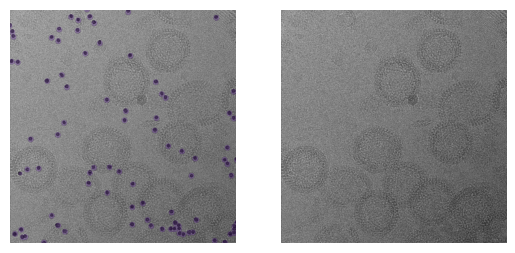

In [4]:
# visualize data and result
masked_mask = np.where(mask.numpy() == 1, mask, np.nan)

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(image, cmap="grey")
axs[0].imshow(masked_mask, cmap="Purples", alpha=0.3, vmin=0, vmax=1)
axs[1].imshow(erased_image, cmap="grey")

axs[0].set_axis_off()
axs[1].set_axis_off()